In [1]:
!pip install cleanvision -q

In [2]:
import os
import pickle

from cleanvision import Imagelab
from IPython.display import clear_output


BASE_PATH: str = "/kaggle/input/hazardous-plant"

Reading images from /kaggle/input/hazardous-plant
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale images ...


  0%|          | 0/1234 [00:00<?, ?it/s]

  0%|          | 0/1234 [00:00<?, ?it/s]

Issue checks completed. To see a detailed report of issues found, use imagelab.report().
Issues found in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | near_duplicates  |           55 |
|  1 | exact_duplicates |           16 |
|  2 | odd_aspect_ratio |            2 |
|  3 | dark             |            1 | 


Top 4 sets of images with near_duplicates issue
Set: 0


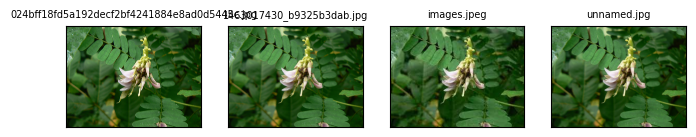

Set: 1


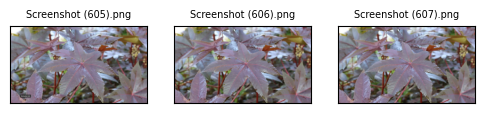

Set: 2


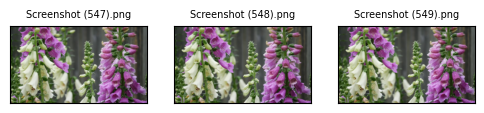

Set: 3


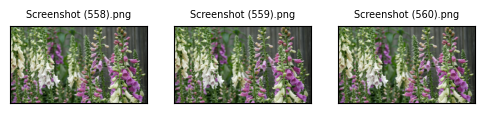


Top 4 sets of images with exact_duplicates issue
Set: 0


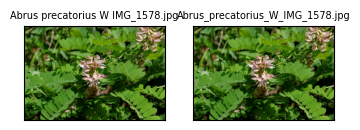

Set: 1


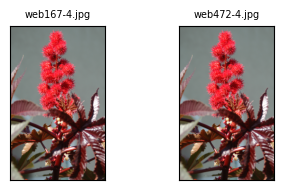

Set: 2


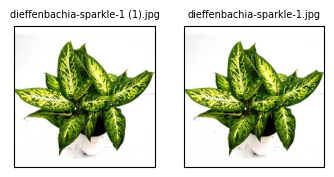

Set: 3


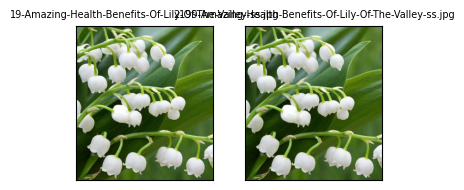

Found 2 examples with odd_aspect_ratio issue in the dataset.


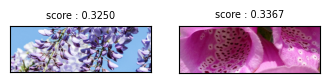

Found 1 example with dark issue in the dataset.


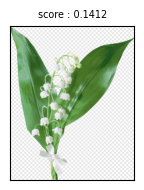

In [3]:
imagelab = Imagelab(data_path=BASE_PATH)
imagelab.find_issues()
imagelab.report()

In [4]:
# keep_paths: list = []
delete_paths: list = []

print("\n" + 50*"*" +"\n")
for folder in sorted(os.listdir(BASE_PATH)):
    imagelab = Imagelab(data_path=f"{BASE_PATH}/{folder}")
    imagelab.find_issues(issue_types={"exact_duplicates" : {}, "near_duplicates" : {}})
    exact_duplicates = imagelab.info["exact_duplicates"]["sets"]
    near_duplicates = imagelab.info["near_duplicates"]["sets"]
    
    # for exact_duplicate in exact_duplicates: keep_paths.append(f"{BASE_PATH}/{folder}/{exact_duplicate[0]}")
    # for near_duplicate in near_duplicates: keep_paths.append(f"{BASE_PATH}/{folder}/{near_duplicate[0]}")

    for exact_duplicate in exact_duplicates: delete_paths.append(f"{exact_duplicate[-1]}")
    for near_duplicate in near_duplicates: delete_paths.append(f"{near_duplicate[-1]}")
    
    clear_output()
    
    # break
    
with open("delete_paths.pkl", "wb") as fp: pickle.dump(delete_paths, fp)